# Introduction

## Nowadays medicine is evolving from days to days. And many people want to use the best methods, even those that cannot be obtained in origin country.

## Since that, people are seeking for new opportunities and companies that can provide them with medicine service abroad.

## Of course, developing countries have less evolved medicine and highly developed countries have streamlined medicine.

## For the companies which want to develop in the sphere of medical tourism, I want to provide information which cities are the origin (or donors) and which can be recipients of the patients who want and can pay for the best medical service.

# Methods

## Firstly, I should figure out how can I find countries that can be donors or recipients of such patients.

### On the basis that patients have to pay for this service, I consider that the best method is to explore about monthly income in the biggest cities in the world.

## I am going to use unece.org ( https://w3.unece.org/PXWeb2015/pxweb/en/STAT/STAT__20-ME__3-MELF/60_en_MECCWagesY_r.px/?rxid=0806c85a-23f8-4249-a4d0-10980df459d1 )

## There are data about monthly income for different countries from 1990 to 2017 years in Internet sites.

## After I'll obtain those data I will be able to create clusters of cities and say if they are good or not for developing medical tourism in them. For instance, patients with high income will tend to get high quality medicine service, while patients with low income will not have the same ability.

## This information can be useful in several ways.
* Firstly, companies can use it merely as a base to establish partner relationship with the local medical center and transfer their patients in another countries when it is appropriate or provide them consults with the best physicians from other countries.
* Secondly, some companies may want to know where they should enforce their business. And if I can say that in some distinct countries people earn more than the middle and have not enough hospitals in their country, then I can state they probably will be ready to pay for such expensive service.

# Data

## I will have to use the following data:

* The information about the biggest cities in the world. I will obtain it here: https://en.wikipedia.org/wiki/List_of_largest_cities

* Information about monthly income in the biggest cities in the world. If there will not be information about some cities I will drop them from my survey. In the future, if it will be possible to get that information, I can recount my data.

* From Foursquare I want to obtain information about how many hospitals there are in each cities. That can be one of the features that people have the lack of medicine service.

# Goals

#### At the end, cities will be divided into two groups - recipients and donors on the base of monthly income and numbers of hospitals. It is possible, that some cities cannot be clear regarded to one of them.

#### So, my potential clients can take a decision in which country they would like to develop their business.

### My credentials for working with Foursquare

In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### I have to import these libraries

In [ ]:
!conda install -c conda-forge geopy lxml --yes

In [1]:
import requests
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim

# I. CREATE a LIST of CITIES

In [3]:
#there are a list of biggest cities of the world
url_cities = 'https://en.wikipedia.org/wiki/List_of_largest_cities'

In [4]:
#READ a table
df_population=pd.read_html(url_cities, na_values=[''])[1] #changing 'Not Assigned' variables to NaN

#DELETE Image column - I do not need it
df_population.drop('Image', axis=1,inplace=True)

#dataframe has 2-leveled columns, I do not enjoy it, so create a new dataframe
df_population_df = pd.DataFrame([])

#COPY values to new dataframe
df_population_df['City']=df_population.iloc[:,0]
df_population_df['Nation']=df_population.iloc[:,1]
df_population_df['Urban Population']=df_population.iloc[:,4]

#DELETE links and anchors: split by '['
df_population_df[['Urban Population','appendix']] = df_population_df['Urban Population'].str.split('[',1,expand=True)
#DELETE the new column, since actually I do not need it
df_population_df.drop('appendix',axis=1,inplace=True)#.shape=df_population.shape

#DROP cells without values
df_population_df.dropna(inplace=True)

#DELETE commas in Population column
df_population_df['Urban Population']=df_population_df['Urban Population'].str.replace(',','')
df_population_df['Urban Population']=df_population_df['Urban Population'].str.replace(' ','')
df_population_df['Urban Population']=list(map(int, df_population_df['Urban Population']))


#SORT and update index in the way I like
df_population_df=df_population_df.sort_values('Urban Population',ascending=0).reset_index(drop = True)


In [5]:
#VIEW the result
df_population_df.head()

,City,Nation,Urban Population
0,Tokyo,Japan,38505000
1,São Paulo,Brazil,36842102
2,Jakarta,Indonesia,30075310
3,Seoul,"Korea, South",25520000
4,Manila,Philippines,24123000


# II. Create a list of a data about monthly income

In [7]:
#I obtained data from https://w3.unece.org
month_income = pd.read_csv('month_income.csv')

In [8]:
month_income.drop('Indicator', axis=1,inplace=True)
month_income.set_index('Country',drop=True,inplace=True)
month_income.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,23.8,30.2,50.5,69.1,82.7,60.8,72.3,88.0,...,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,NaN
Armenia,NaN,NaN,NaN,6.7,6.1,17.4,22.9,27.7,35.6,37.7,...,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
Austria,2173.8,2250.5,2486.8,2330.5,2445.6,2771.2,2709.9,2436.0,2492.8,2425.9,...,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
Azerbaijan,NaN,NaN,NaN,NaN,NaN,14.2,20.8,35.5,43.5,44.8,...,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
Belarus,NaN,NaN,NaN,NaN,NaN,65543.9,91622.7,87243.0,100486.2,78544.7,...,406.4,351.4,408.7,381.9,440.9,570.0,592.0,421.6,NaN,NaN


### There is information about monthly income in 52 countries for 28 years

In [10]:
month_income.shape

(52, 28)

In [12]:
month_income.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18.000000,20.000000,23.00000,28.000000,32.000000,38.000000,41.000000,43.000000,45.000000,46.000000,...,51.000000,50.00000,51.000000,51.000000,51.000000,50.000000,50.000000,49.000000,48.000000,43.000000
mean,2072.255556,2043.440000,1943.93913,1513.850000,1409.937500,3123.823684,3593.726829,3266.658140,3497.982222,2946.769565,...,2317.823529,2228.96000,2198.478431,2355.237255,2240.605882,2360.592000,2390.032000,2102.940816,2177.912500,2337.860465
std,690.909877,808.756831,1099.17633,1154.668879,1224.364424,10484.163552,14151.819815,13165.703864,14836.792044,11458.745846,...,1984.140237,1921.31487,1910.582923,2101.643207,2019.264851,2106.878526,2131.228776,1902.787494,1901.390536,1911.895808
min,294.100000,80.800000,8.20000,6.700000,6.100000,7.500000,10.100000,8.800000,11.800000,9.400000,...,67.600000,68.60000,80.800000,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000,0.400000
25%,1914.450000,1855.425000,1372.10000,189.275000,124.125000,142.000000,120.700000,138.750000,123.700000,90.825000,...,659.650000,596.50000,609.950000,640.600000,627.600000,670.200000,675.325000,561.900000,584.950000,790.300000
50%,2171.000000,2240.800000,2343.80000,1995.400000,1627.000000,1244.250000,1094.000000,1033.000000,1059.600000,853.700000,...,1380.800000,1354.45000,1273.400000,1408.300000,1246.900000,1296.400000,1328.050000,1142.800000,1221.600000,1604.300000
75%,2422.900000,2426.075000,2604.55000,2406.275000,2457.400000,2575.575000,2658.100000,2444.900000,2531.700000,2449.325000,...,4181.100000,3796.50000,3871.300000,4102.550000,3998.750000,4293.175000,4442.625000,3788.100000,3874.950000,3948.250000
max,3269.800000,3389.600000,3728.30000,3661.000000,4013.500000,65543.900000,91622.700000,87243.000000,100486.200000,78544.700000,...,6520.200000,6592.80000,6900.100000,8122.800000,7719.000000,7889.300000,7999.200000,7540.700000,7338.900000,7351.700000


### It may be useul to check the count of the values.
### And it is obvious from the above cell that in 1990 year there were only some countries that provided information about monthly income. In 1998 almost all of the countries (45 of 52) from my list provided that information.
### So, I am going to use information from 1998 to 2017 years.
### Additionally, I am going to drop countries from my investigation that do not provide information in 1998-2017 years.

In [14]:
month_income2=month_income.iloc[:,8:28]
month_income2=month_income2.loc[(month_income.isna().sum(axis=1)<7),:]
#dropna(axis=0)

In [15]:
month_income2

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,
Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,302.4,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,NaN
Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,217.0,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,3873.8,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,251.5,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,4222.6,4690.4,4467.8,4295.0,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2
Canada,2125.9,2186.0,2301.6,2243.0,2232.0,2547.6,2857.4,3247.0,3629.6,3998.4,4177.3,3947.1,4433.9,4788.8,4909.1,4919.2,4732.1,4148.0,4019.4,4174.4
Croatia,649.2,639.9,588.4,605.8,684.5,840.4,993.1,1050.3,1137.2,1316.2,1536.0,1465.3,1396.5,1458.7,1345.1,1391.2,1384.0,1109.0,1139.1,1219.2
Czechia,386.9,380.8,365.5,395.7,504.4,628.3,746.2,832.2,934.2,1103.1,1380.8,1243.6,1273.4,1408.3,1298.2,1296.2,1256.4,1089.1,1147.1,1285.6
Denmark,3152.4,3114.9,2766.2,2764.3,3050.0,3784.3,4299.2,4440.4,4652.9,5230.3,5848.7,5760.6,5674.3,6063.8,5725.4,5995.0,6150.8,5245.9,5341.6,5487.1


In [17]:
month_income2.shape

(36, 20)

### Now, there are almost all data present in the dataframe.

### So, for the years from 1998 to 2015 there are 36 countries in my dataframe.
### It is possible, that in 2016 and 2017 two countries have not just provided this information.
### And I have 5 options to resolve this problem:
* drop this years from the investigation
* count their values with regression model
* use the mean values
* or to proceed with this dataframe as it is.
* finally, I can examine Internet sources and find the missed data.

#### The first option will reduce my dataframe, but it is not very big, so accuracy will decrease...
#### The second option will be good.
#### The third option will be fast.
#### And it is possible that the third option will affect my results in unexpected way.

### So, I'll try to find the missed data and if I will not be successful in that, I will use the 2nd or 3rd option.

### While browsing Internet, I found:
* Albania monthly income in 2017 is equal to 460 -  you can check it here: http://www.xinhuanet.com/english/2018-05/03/c_137154122.htm
* Tajikistan monthly income in 2017 and is equal to 123 and 134 - you can check it here: http://www.cisstat.com/rus/macro/zp-2.pdf

### So, I just added these data to the table.

In [19]:
month_income2.loc['Albania','2017']=460

In [20]:
month_income2.loc['Tajikistan','2016']=123
month_income2.loc['Tajikistan','2017']=134

In [21]:
month_income2

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,
Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,302.4,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,460.0
Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,217.0,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,3873.8,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,251.5,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,4222.6,4690.4,4467.8,4295.0,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2
Canada,2125.9,2186.0,2301.6,2243.0,2232.0,2547.6,2857.4,3247.0,3629.6,3998.4,4177.3,3947.1,4433.9,4788.8,4909.1,4919.2,4732.1,4148.0,4019.4,4174.4
Croatia,649.2,639.9,588.4,605.8,684.5,840.4,993.1,1050.3,1137.2,1316.2,1536.0,1465.3,1396.5,1458.7,1345.1,1391.2,1384.0,1109.0,1139.1,1219.2
Czechia,386.9,380.8,365.5,395.7,504.4,628.3,746.2,832.2,934.2,1103.1,1380.8,1243.6,1273.4,1408.3,1298.2,1296.2,1256.4,1089.1,1147.1,1285.6
Denmark,3152.4,3114.9,2766.2,2764.3,3050.0,3784.3,4299.2,4440.4,4652.9,5230.3,5848.7,5760.6,5674.3,6063.8,5725.4,5995.0,6150.8,5245.9,5341.6,5487.1


In [23]:
#I'd like to save my job
month_income2.to_csv('month_income2.csv')

In [24]:
#try to read
month_income2=pd.read_csv('month_income2.csv')
month_income2.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,...,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,460.0
1,Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,...,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
2,Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,...,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
3,Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,...,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
4,Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,...,4690.4,4467.8,4295.0,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2


# III. Collect information about the cities from the list
### coordinates and hospitals

In [26]:
df_population_df.head()

,City,Nation,Urban Population
0,Tokyo,Japan,38505000
1,São Paulo,Brazil,36842102
2,Jakarta,Indonesia,30075310
3,Seoul,"Korea, South",25520000
4,Manila,Philippines,24123000


In [28]:
i=0
df_population_df['Latitude']=range(len(df_population_df))
df_population_df['Longitude']=range(len(df_population_df))
while i<len(df_population_df):
    address = df_population_df.iloc[i,0]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df_population_df.iloc[i,3]=latitude
    df_population_df.iloc[i,4]=longitude
    i=i+1

In [29]:
df_population_df.head()

,City,Nation,Urban Population,Latitude,Longitude
0,Tokyo,Japan,38505000,35.682839,139.759455
1,São Paulo,Brazil,36842102,-23.550651,-46.633382
2,Jakarta,Indonesia,30075310,-6.175394,106.827183
3,Seoul,"Korea, South",25520000,37.566679,126.978291
4,Manila,Philippines,24123000,14.590622,120.979970


In [31]:
### I'd like to save my job to a file to be able to ask him for result without repeating previous steps
df_population_df.to_csv('nations.csv')

In [32]:
### So, I try to read my file, drop index and view result again.
df_population_df=pd.read_csv('nations.csv').reset_index(drop=True)
df_population_df.set_index('Unnamed: 0',inplace=True)
df_population_df.index.name=None
df_population_df.head()

,City,Nation,Urban Population,Latitude,Longitude
0,Tokyo,Japan,38505000,35.682839,139.759455
1,São Paulo,Brazil,36842102,-23.550651,-46.633382
2,Jakarta,Indonesia,30075310,-6.175394,106.827183
3,Seoul,"Korea, South",25520000,37.566679,126.978291
4,Manila,Philippines,24123000,14.590622,120.979970


In [34]:
df_population_df.shape

(109, 5)

### Here I should provide the coordinates of cities which is in my interests.
### At the end, after 3 loops I'll get the list of hospitals in the biggest cities of the world.
### The result is saved in distinct file, so that I will not need to repeat code executing.

In [36]:
#create the list for responses
list_r=[]
venues_list=[]
j=0
#### GET the response from FS: to get result of the request and its length
#### For each row in dataframe; numerate row by j-index
#### count the results by n
while j<len(df_population_df):
    print(j)#you can see if there will be some trouble with server or some else.
            #At the end j should be equal to the count of cities
    lat = df_population_df['Latitude'][j]
    lng = df_population_df['Longitude'][j]
    radius='20000'#is the center of the city; I learn that it the most suitable for my task: there will be much more hospitals with the more area,
                  #but in the real 20km may be enough. Anyway, it can be changed as it need.
    LIMIT='500'#it is not accurate value, because I can obtain only 100 values per query. I will crack it,
               #but now I already know that there are no any in the list with the more than 300 hospitals.
    category_id='4bf58dd8d48988d196941735'#This is the ID of category I want to work with = 'hospitals'
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        category_id,
        radius, 
        LIMIT)
    #so, after I obtained url, I can get result and its length
    result=requests.get(url).json()# is the only 1 query to Foursquare
    length=result["response"]['totalResults']#from that query I obtain the length of answer to my query
    #NOW we know the length
    #k is equal to length of the list divided by 100, since I can get only 100 per request
    k=float(length/100)
    # set i to zero
    i=0
    #create the list of url
    list_u=[]
    #while k is less then length, we can execute the following; I will add 100 at the end of the loop
    #so, at the next circle it will be increased by 100; when it exceed the length, loop will not be executed
    while k<length:
        #u is url plus i *100, so that if it is the first step, it will be just url
        u=url+'&offset='+str(i*100)
        #add u to the list of url
        list_u.append(u)
        #execute the query with url: here url-i created, and the next one will be url-i*100
        #when i=0 it is just url&offset=0, and when it is 1, url is url&offset=100, and so on
        x=requests.get(list_u[i]).json()["response"]['groups'][0]['items']#list_u[i] - deleted
        #add the response to list_r
        list_r.append(x)
        #so, this way I obtained the x from the url, and I am ready to send it to my venue_list
        #set the k for this loop-section
        k_venue_loop=float(length/100)
        #set the i for this loop-section
        i_venue_loop=0
        while i_venue_loop==0:
            venues_list.append([(
                df_population_df['City'][j],
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'], 
                v['venue']['categories'][0]['name']) for v in list_r[i_venue_loop]])
            #increase i by 1
            i_venue_loop=int(i_venue_loop+1)
            hospitals_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            #to save my results
            hospitals_venues.to_csv('hospitals_venues.csv')
        list_r=[]
        #increase i by 1
        i=i+1
        #increase k by 100
        k=k+100
    j=j+1

### Read the file and see its head

In [37]:
hospitals_venues=pd.read_csv('hospitals_venues.csv').reset_index(drop=True)
hospitals_venues.set_index('Unnamed: 0',inplace=True)
hospitals_venues.index.name=None
hospitals_venues.head()

,0,1,2,3,4
0,Tokyo,Japan Red Cross Medical Center (日本赤十字社医療センター),35.654831,139.717755,Hospital
1,Tokyo,St. Luke's Hospital (聖路加国際病院),35.667372,139.777500,Hospital
2,Tokyo,鶯谷健診センター,35.725696,139.775926,Hospital
3,Tokyo,Tokyo Metropolitan Hiroo Hospital (東京都立広尾病院),35.646944,139.722337,Hospital
4,Tokyo,JR Tokyo General Hospital (JR東京総合病院),35.685145,139.700143,Hospital


### Count clinics in each city

In [39]:
# Actually, all I need is the number of hospitals in each city
hospitals_count=pd.DataFrame(hospitals_venues.loc[hospitals_venues['4']=='Hospital','0':'4'].groupby('0').count()['4'])
hospitals_count=hospitals_count.reset_index()
hospitals_count.index.name=None
hospitals_count.head()

,0,4
0,Abuja,16
1,Addis Ababa,8
2,Ahmedabad,21
3,Ankara,209
4,Baku,99


# IV. DATA

## In the previous steps I prepared data for this investigation

## They are:

In [41]:
#data about population in the biggest cities of the world
df_population_df=pd.read_csv('nations.csv').reset_index(drop=True)
df_population_df.set_index('Unnamed: 0',inplace=True)
df_population_df.index.name=None
df_population_df.head()

,City,Nation,Urban Population,Latitude,Longitude
0,Tokyo,Japan,38505000,35.682839,139.759455
1,São Paulo,Brazil,36842102,-23.550651,-46.633382
2,Jakarta,Indonesia,30075310,-6.175394,106.827183
3,Seoul,"Korea, South",25520000,37.566679,126.978291
4,Manila,Philippines,24123000,14.590622,120.979970


In [43]:
#data about monthly income
month_income2=pd.read_csv('month_income2.csv')
month_income2.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,...,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,460.0
1,Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,...,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
2,Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,...,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
3,Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,...,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
4,Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,...,4690.4,4467.8,4295.0,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2


In [45]:
#data about the number of hospitals in the biggest cities of the world
hospitals_count.head()

,0,4
0,Abuja,16
1,Addis Ababa,8
2,Ahmedabad,21
3,Ankara,209
4,Baku,99


#### All data are gathered from the Internet, checked and prepared.
#### All rows in the Dataframes are filled.

# V. Analysis
#### My aim is to provide new information, create a clusters of cities where some company can develop its business in the sphere of medical tourism.
#### Having in mind the fact that region (= city) can be good or bad for this business (i.e. there are two options, or main classes of cities), I opted for use k-means method.
#### Really, it is hard to use regression model due to the low amount of data; moreover, there was a point of economic crisis in 2008, that had affect on the values which I am investigating.
#### Other methods have different disadvantages because of while using them I should create some markers or can use them only for prediction. Actually, they can be used in the future investigations as a continues of this one.

# Clustering the cities by population and numbers of clinics
## It can be truth that number of clinics per population in some city can reflect the level of medical care development.
##### Of course, the lack of information can lead to misleading and incorrect results. Ideally, I should use as much sources as it possible to obtain information about all hospitals in each investigated city. But this time I am trying to use Foursquare database as it is one of the main item of this course.

In [47]:
hospitals_count.shape

(107, 2)

In [49]:
df_population_df.shape

(109, 5)

In [51]:
#combining 2 dataframe
k=0
N_clinics=[]
for i in df_population_df['City']:
    city=df_population_df['City'][k]
    number=hospitals_count.loc[hospitals_count['0']==city,'4'].values
    N_clinics.append(''.join(map(str, number)))
    k=k+1

df_population_df['N_clinics']=N_clinics
df_population_df.sort_values('N_clinics').head()

,City,Nation,Urban Population,Latitude,Longitude,N_clinics
90,Tunis,Tunisia,2294547,33.843941,9.400138,
21,Lagos,Nigeria,13123000,20.017111,103.378253,
75,Suzhou,China,3302152,31.301693,120.581073,10
92,Lanzhou,China,2177130,36.060690,103.830569,10
48,Chengdu,China,6316922,30.662421,104.063322,10


In [53]:
# treat and check the types
df_population_df['N_clinics']=pd.to_numeric(df_population_df['N_clinics'])
df_population_df.dtypes

City                 object
Nation               object
Urban Population      int64
Latitude            float64
Longitude           float64
N_clinics           float64
dtype: object

## Different numbers of rows are due to the lack of the data about clinics in 2 city. I will use the data that I have and drop those cities from the dataframe.

In [55]:
# I want to preserve df_population_df for further steps
df_population_df = df_population_df.dropna().reset_index(drop=True)
df_population_clustered = df_population_df.iloc[:,[2,5]].reset_index(drop=True)
df_population_clustered['Urban Population']=df_population_clustered['Urban Population']/1000000
df_population_clustered.sort_values('N_clinics').head()

,Urban Population,N_clinics
65,3.964593,4.0
102,1.200000,4.0
99,1.619000,4.0
49,6.188100,4.0
44,6.542944,5.0


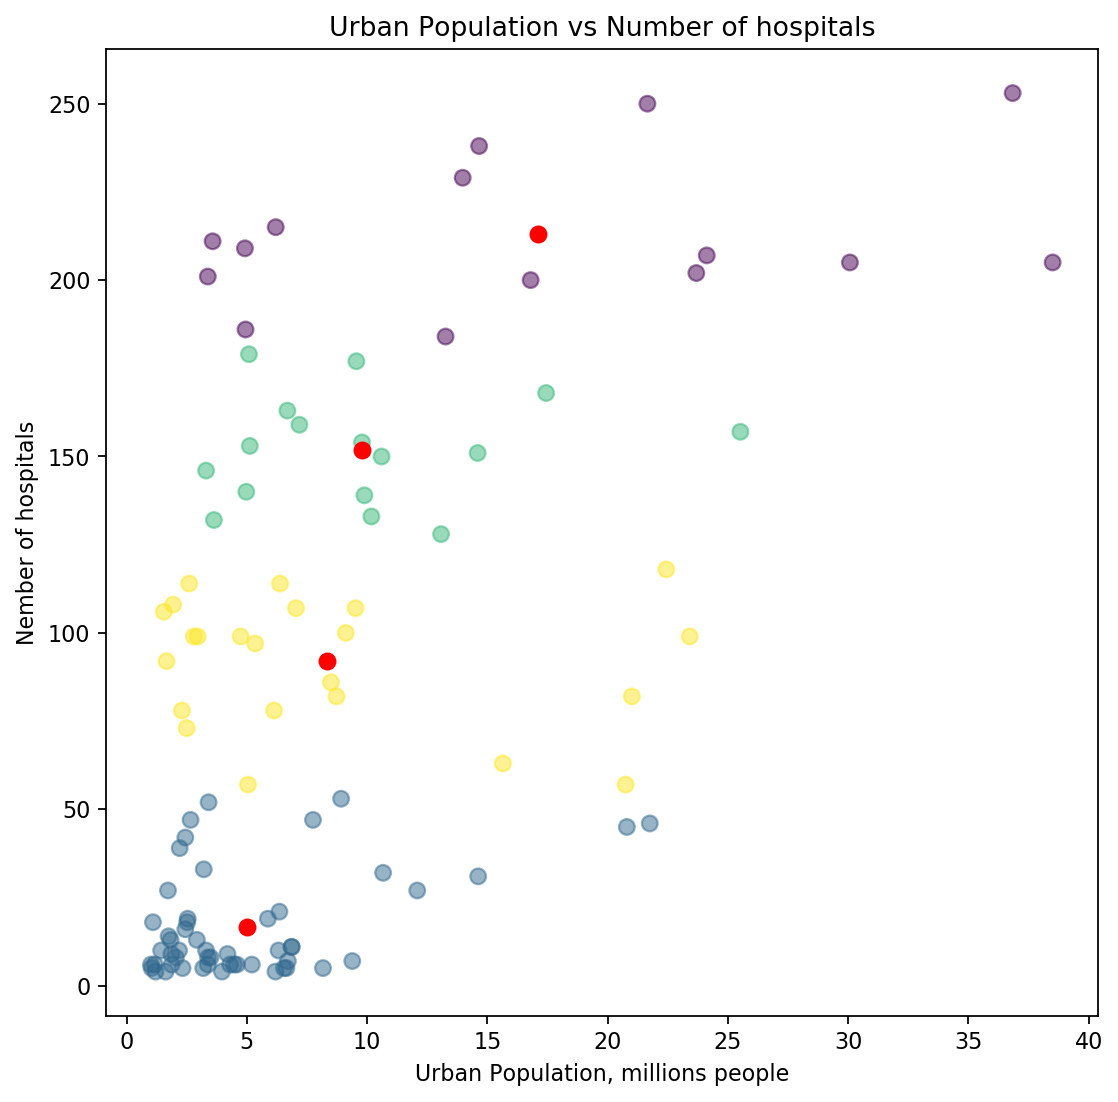

In [57]:
# start clustering
kmeans = KMeans(n_clusters=4, init = "k-means++", n_init = 24).fit(df_population_clustered)
#k_means.fit(df_population_clustered)

centroids = kmeans.cluster_centers_
# check the result
plt.figure(figsize=(8, 8), dpi=160)

plt.scatter(df_population_clustered['Urban Population'], df_population_clustered['N_clinics'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Urban Population vs Number of hospitals')
plt.xlabel('Urban Population, millions people')
plt.ylabel('Nember of hospitals')
plt.savefig('up-nc.png', format='png')

In [58]:
# save result to the dataframe; it should be used below
predict=kmeans.predict(df_population_clustered)

df_population_clustered['Class'] = pd.Series(predict, index=df_population_clustered.index)

df_population_clustered['City']=df_population_df['City']


In [59]:
#save the result to the file
df_population_clustered.to_csv('df_population_clustered.csv')

# Clustering the cities by monthly income

In [60]:
month_income2.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,...,408.6,379.8,334.7,361.3,348.6,350.1,353.8,303.1,300.8,460.0
1,Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,...,285.7,264.3,274.7,290.2,350.3,357.7,381.3,359.1,363.1,404.1
2,Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,...,4319.2,4181.5,4025.4,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2
3,Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,...,334.0,370.8,413.0,461.2,507.1,541.8,566.7,455.7,313.2,307.1
4,Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,...,4690.4,4467.8,4295.0,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2


In [62]:
month_income2_describe = month_income2.describe().transpose().reset_index()
month_income2_describe


,index,count,mean,std,min,25%,50%,75%,max
0,1998,36.0,1446.930556,1241.467508,11.8,260.100,1351.20,2550.325,4011.3
1,1999,36.0,1439.258333,1238.894424,9.4,258.950,1348.55,2491.400,3935.4
2,2000,36.0,1345.797222,1155.047342,7.7,228.125,1252.50,2324.075,3575.9
3,2001,36.0,1359.755556,1160.215041,10.1,227.975,1264.70,2277.200,3730.8
4,2002,36.0,1476.830556,1255.048909,11.9,249.425,1382.40,2378.225,4103.7
5,2003,36.0,1765.947222,1482.075927,14.7,314.325,1574.05,2896.350,4769.4
6,2004,36.0,1993.952778,1649.879267,20.9,374.000,1730.65,3286.725,5152.2
7,2005,36.0,2082.994444,1694.824323,27.0,427.825,1779.10,3376.125,5273.0
8,2006,36.0,2195.758333,1757.228277,35.2,510.300,1865.50,3666.625,5334.4
9,2007,36.0,2491.558333,1946.700694,47.4,681.350,2091.25,4029.875,5866.4


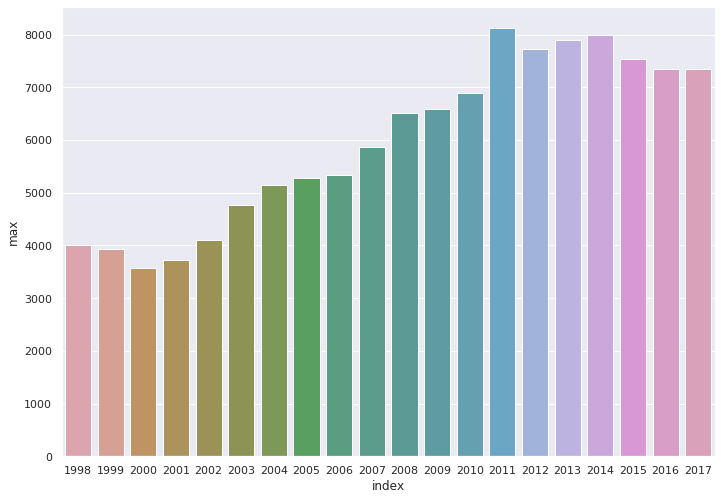

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g_mean = sns.barplot(x="index", y="mean", data=month_income2_describe, saturation=.5)
g_max = sns.barplot(x="index", y="max", data=month_income2_describe, saturation=.5)

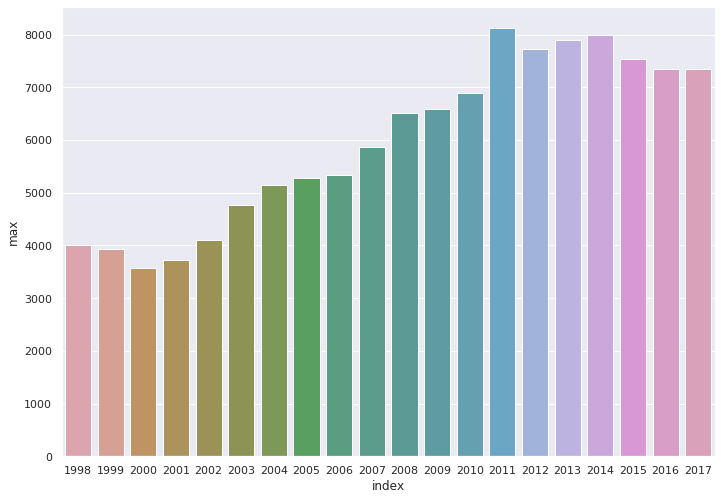

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g_max = sns.barplot(x="index", y="max", data=month_income2_describe, saturation=.5)

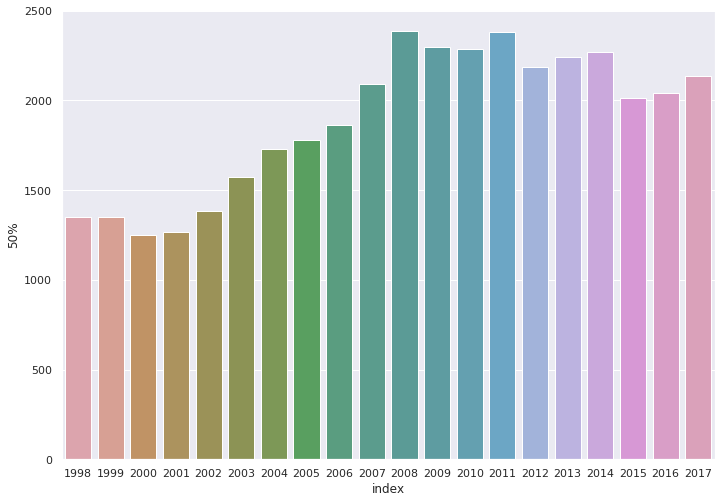

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g_max = sns.barplot(x="index", y="50%", data=month_income2_describe, saturation=.5)

#### from descriptive statistic it can be seen that until 2008 there was some growth almost in all countries, but after that the mean is almost the same, while max value have surged.
#### So, I am going to divide my dataframe, create Mean for 1998-2008 and Mean for 2009-2017 and cluster cities on these new values.

In [67]:
#month_income2['Mean 1998-2008']=month_income2.iloc[:,0:12].mean()
k=0
mean_1998_2008=[]
mean_2009_2017=[]
for i in month_income2['Country']:
    Country=month_income2['Country'][k]
    mean1=month_income2.loc[month_income2['Country']==i,'1998':'2008'].mean(axis=1).values
    mean2=month_income2.loc[month_income2['Country']==i,'2009':'2017'].mean(axis=1).values
    mean_1998_2008.append(''.join(map(str, mean1.round(2))))
    mean_2009_2017.append(''.join(map(str, mean2.round(2))))
    k=k+1
month_income2['Mean 1998-2008']=mean_1998_2008
month_income2['Mean 2009-2017']=mean_2009_2017
# treat and check the types
month_income2['Mean 1998-2008']=pd.to_numeric(month_income2['Mean 1998-2008'])
month_income2['Mean 2009-2017']=pd.to_numeric(month_income2['Mean 2009-2017'])
month_income2.head()

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,Mean 1998-2008,Mean 2009-2017,Class
0,Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,...,361.3,348.6,350.1,353.8,303.1,300.8,460.0,176.86,354.69,0
1,Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,...,290.2,350.3,357.7,381.3,359.1,363.1,404.1,101.35,338.31,0
2,Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,...,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2,2950.04,4119.89,1
3,Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,...,461.2,507.1,541.8,566.7,455.7,313.2,307.1,120.14,437.40,0
4,Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,...,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2,3248.38,4377.94,1


In [69]:
month_income_clustered = month_income2.loc[:,['Mean 1998-2008','Mean 2009-2017']]
month_income_clustered.head()

,Mean 1998-2008,Mean 2009-2017
0,176.86,354.69
1,101.35,338.31
2,2950.04,4119.89
3,120.14,437.40
4,3248.38,4377.94


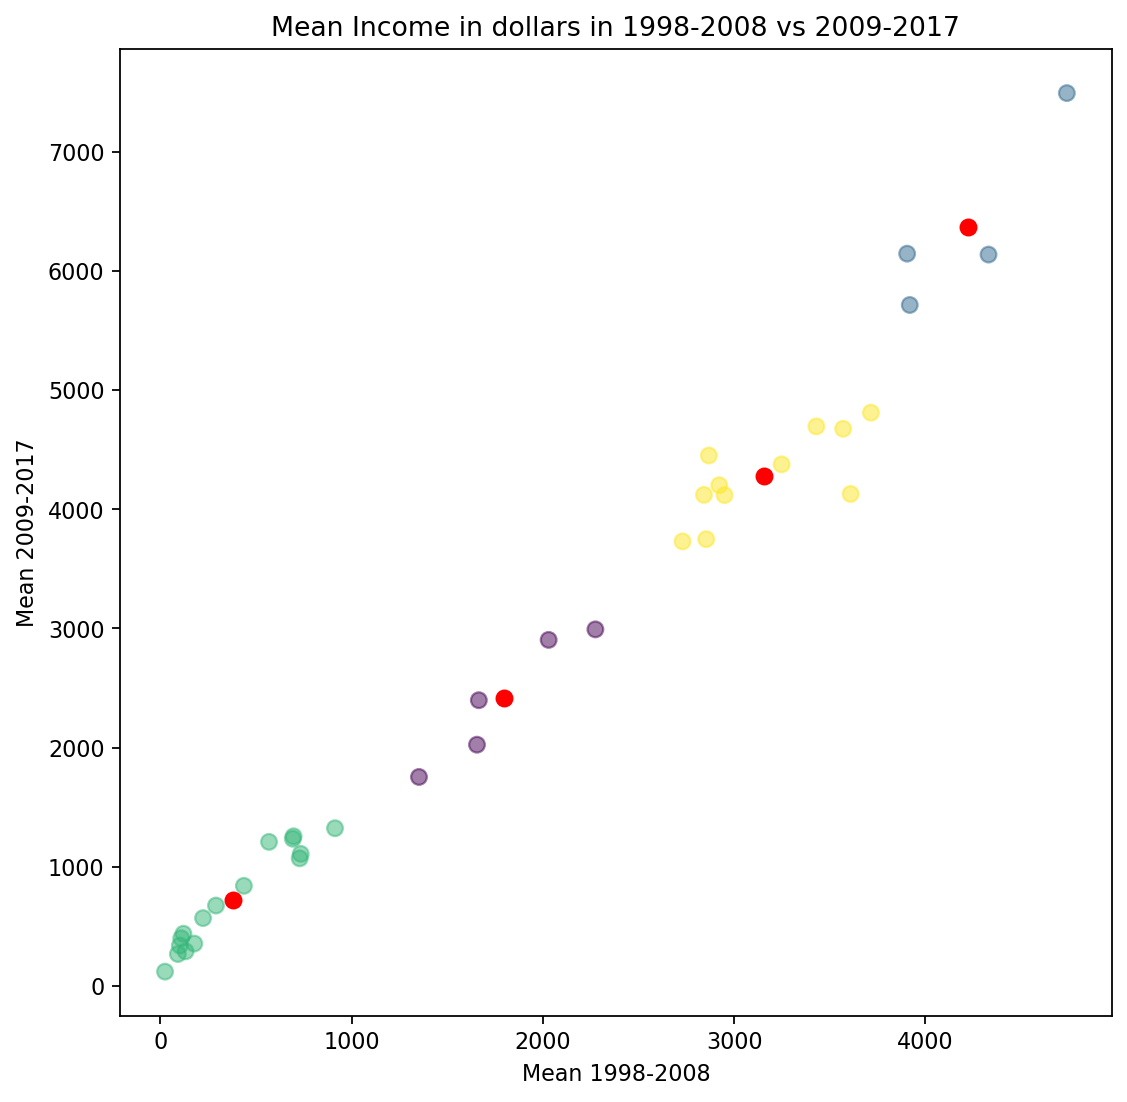

In [71]:
# start clustering
kmeans = KMeans(n_clusters=4, init = "k-means++", n_init = 12).fit(month_income_clustered)#I tried to use numbers of clusters 2, 3 and 4
#k_means.fit(df_population_clustered)

centroids = kmeans.cluster_centers_
# check the result
plt.figure(figsize=(8, 8), dpi=160)
plt.scatter(month_income_clustered['Mean 1998-2008'], month_income_clustered['Mean 2009-2017'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Mean Income in dollars in 1998-2008 vs 2009-2017')
plt.xlabel('Mean 1998-2008')
plt.ylabel('Mean 2009-2017')
plt.savefig('means_all.png', format='png')

In [72]:
# save result to the dataframe
predict=kmeans.predict(month_income_clustered)

month_income2['Class'] = pd.Series(predict, index=month_income2.index)
month_income2.head()


,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,Mean 1998-2008,Mean 2009-2017,Class
0,Albania,72.3,88.0,92.9,103.3,118.0,152.0,185.2,200.2,222.6,...,361.3,348.6,350.1,353.8,303.1,300.8,460.0,176.86,354.69,0
1,Armenia,35.6,37.7,42.1,44.1,47.7,60.1,81.4,113.8,149.7,...,290.2,350.3,357.7,381.3,359.1,363.1,404.1,101.35,338.31,0
2,Austria,2492.8,2425.9,2151.2,2129.0,2306.2,2808.4,3201.8,3296.4,3445.7,...,4312.5,4096.7,4330.9,4436.4,3788.1,3873.3,4034.2,2950.04,4119.89,1
3,Azerbaijan,43.5,44.8,49.5,55.8,64.9,78.8,101.2,130.7,166.8,...,461.2,507.1,541.8,566.7,455.7,313.2,307.1,120.14,437.40,0
4,Belgium,2671.1,2691.7,2391.5,2379.8,2590.4,3160.2,3541.5,3615.3,3777.7,...,4687.4,4443.1,4691.8,4742.5,3957.0,3989.7,4127.2,3248.38,4377.94,1


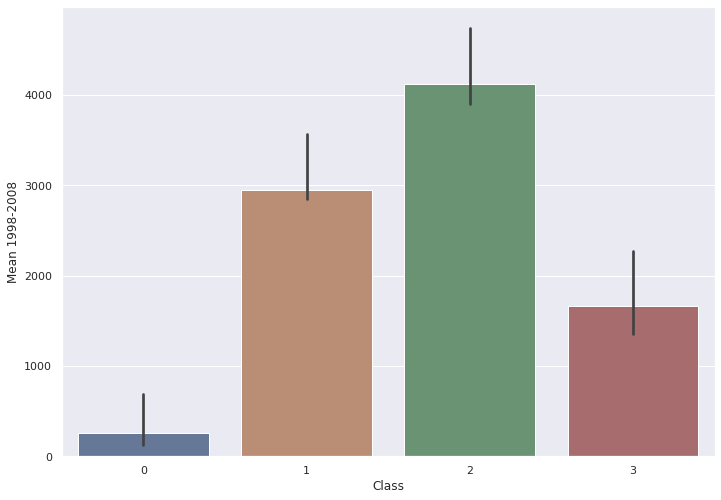

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g_max = sns.barplot(x="Class", y="Mean 1998-2008", data=df, saturation=.5, estimator=median)

## So, we can review information about income and payment ability in different countries.
#### Class = 0 is class that is not well to develop medical tourism; I can consider that civilians in those countries cannot pay for expensive treatment courses. Anyway, it can be good idea to open in these countries online office via which clients may ask for help or just follow them and wait for their economic surge.
#### Class = 3 is potentially good group for providing new patients. There are can be enough people with more than middle monthly income. It can be investigated in the future. There is also Israel in this group, which is well-known recipients of patients.
#### Class = 1 is potentially good recipient for patients. In this class there are some countries with highly-developed medicine, for example United States,France, Germany and United Kingdom, which are already actively work in the medical tourism.
#### Class = 2 is very good source of patients. But there are also highly developed medicine too. So, these countries can be donors as well as recipients of patients from others. Citizens in these countries have middle income almost twice more than in Class 2. It can be good idea to have one office which will work with citizens from these countries: it is hardly to expect many patients from them, but it isn't possible to recommend to ignore them because of the possibility of high profit.

## So, it is time to browse the full list

In [75]:
month_income_clustered = month_income2.iloc[:,[0,-1,-3,-2]]
month_income_clustered.sort_values('Class')

,Country,Class,Mean 1998-2008,Mean 2009-2017
0,Albania,0,176.86,354.69
15,Hungary,0,728.19,1070.53
24,Poland,0,733.56,1107.76
12,Georgia,0,108.68,399.71
26,Republic of Moldova,0,91.15,267.09
27,Romania,0,290.26,673.87
9,Estonia,0,567.75,1208.44
20,Lithuania,0,436.36,839.51
28,Slovakia,0,692.37,1234.73
6,Croatia,0,912.82,1323.12


## There are some problem with two classes within which people has middle income.
## In these class there are as well-known recipients and donors of patients. So, lets try to distinguish them.

In [77]:
### USA and Israel are well-known recipients of patients. It is not possible to ignore this fact, since clustering will be inaccurate.
###I'll use them to create two additional dataframes
isr_class=month_income_clustered.loc[(month_income_clustered['Country']=='Israel'),'Class'].values
isr_class=int(''.join(map(str, isr_class)))

usa_class=month_income_clustered.loc[(month_income_clustered['Country']=='United States'),'Class'].values
usa_class=int(''.join(map(str, usa_class)))

month_income_clustered_1 = month_income_clustered.loc[(month_income_clustered['Class']==isr_class),['Mean 1998-2008','Mean 2009-2017']]

month_income_clustered_2 = month_income_clustered.loc[(month_income_clustered['Class']==usa_class),['Mean 1998-2008','Mean 2009-2017']]

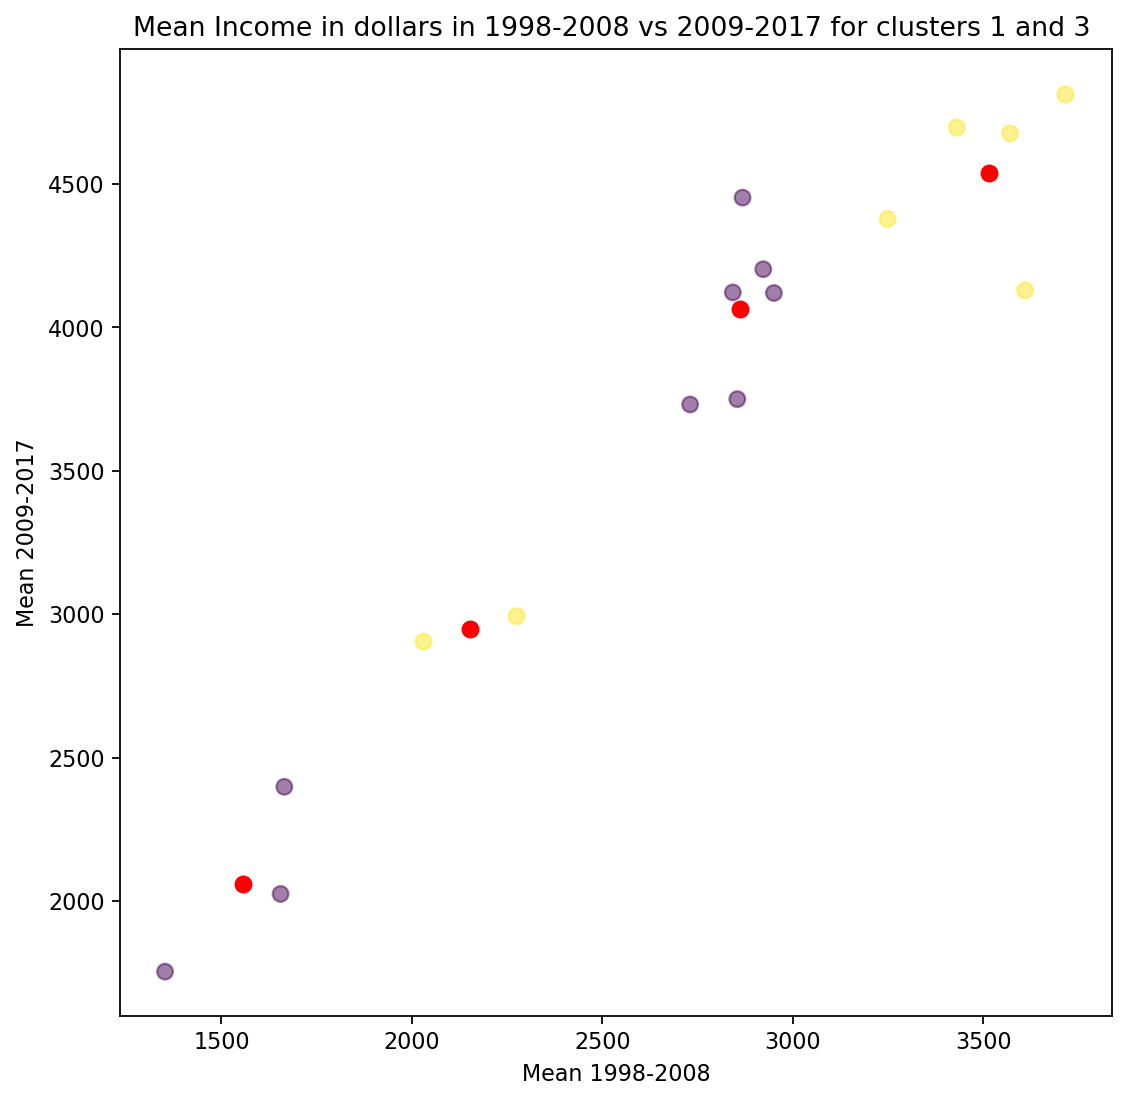

In [78]:
# start clustering; there should be exactly 2 clusters, because in this case I want to determine
#which country is donor and which is recipient for patient.
kmeans1 = KMeans(n_clusters=2, init = "k-means++", n_init = 12).fit(month_income_clustered_1)
kmeans2 = KMeans(n_clusters=2, init = "k-means++", n_init = 12).fit(month_income_clustered_2)

centroids1 = kmeans1.cluster_centers_
# check the result
plt.figure(figsize=(8, 8), dpi=160)
plt.scatter(month_income_clustered_1['Mean 1998-2008'], month_income_clustered_1['Mean 2009-2017'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)


centroids2 = kmeans2.cluster_centers_
# check the result

plt.scatter(month_income_clustered_2['Mean 1998-2008'], month_income_clustered_2['Mean 2009-2017'], c= kmeans2.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
plt.title('Mean Income in dollars in 1998-2008 vs 2009-2017 for clusters 1 and 3 ')
plt.xlabel('Mean 1998-2008')
plt.ylabel('Mean 2009-2017')
plt.savefig('means_2.png', format='png')

In [79]:
# save result to the dataframe
predict1=kmeans1.predict(month_income_clustered_1)
predict2=kmeans2.predict(month_income_clustered_2)
#month_income_clustered['Class'] = pd.Series(predict, index=month_income_clustered.index)
#month_income2.head()
#month_income2['Country']=month_income2['City']


In [80]:
month_income_clustered_1['Donor or Recipient']=pd.Series(predict1, index=month_income_clustered_1.index)
month_income_clustered_1

,Mean 1998-2008,Mean 2009-2017,Donor or Recipient
14,1655.29,2024.39,0
17,1665.02,2397.98,0
18,2274.48,2992.60,1
25,1351.98,1753.53,0
29,2030.05,2904.39,1


In [82]:
month_income_clustered_2['Donor or Recipient']=pd.Series(predict2, index=month_income_clustered_2.index)
#on the plot above we can find that two groups is quiete close to each other
#and both of them are between to groups which was labeled alike;
#so, lets set values of the graph Donor or Recipient to 0, which is correspond to the highest values in this group.
#0 should be cheked and change in the case of rerun the file
month_income_clustered_2['Donor or Recipient'].replace(1, 0,inplace=True)
month_income_clustered_2

,Mean 1998-2008,Mean 2009-2017,Donor or Recipient
2,2950.04,4119.89,0
4,3248.38,4377.94,0
5,2867.80,4452.44,0
10,2842.21,4121.90,0
11,2730.10,3731.14,0
13,2854.02,3749.86,0
16,3715.29,4812.01,0
22,3429.97,4696.82,0
30,2922.07,4202.81,0
34,3609.28,4129.31,0


In [84]:
### Combine two dataframes and check the result
month_income_clustered_12=month_income_clustered_1.append(month_income_clustered_2)
month_income_clustered_12.sort_values('Donor or Recipient')

,Mean 1998-2008,Mean 2009-2017,Donor or Recipient
14,1655.29,2024.39,0
17,1665.02,2397.98,0
25,1351.98,1753.53,0
2,2950.04,4119.89,0
4,3248.38,4377.94,0
5,2867.80,4452.44,0
10,2842.21,4121.90,0
11,2730.10,3731.14,0
13,2854.02,3749.86,0
16,3715.29,4812.01,0


In [86]:
### Combine with month_income_clustered dataframe to see the name of countries.
don_rec_df = month_income_clustered_12.merge(month_income_clustered, left_on='Mean 1998-2008', right_on='Mean 1998-2008')

In [87]:
don_rec_df.head()

,Mean 1998-2008,Mean 2009-2017_x,Donor or Recipient,Country,Class,Mean 2009-2017_y
0,1655.29,2024.39,0,Greece,2,2024.39
1,1665.02,2397.98,0,Israel,2,2397.98
2,2274.48,2992.60,1,Italy,2,2992.60
3,1351.98,1753.53,0,Portugal,2,1753.53
4,2030.05,2904.39,1,Spain,2,2904.39


In [89]:
# drop unnecessary columns
don_rec_df=don_rec_df.drop(['Class','Mean 2009-2017_y'],axis=1)

In [90]:
# I would like to mark recipients not as 0, but R, and donors as D
don_rec_df['Donor or Recipient'].replace(0, 'R',inplace=True)
don_rec_df['Donor or Recipient'].replace(1, 'D',inplace=True)

In [91]:
#save the result
don_rec_df.to_csv('don_rec_df.csv')

In [92]:
#read the result and proceed
don_rec_df = pd.read_csv('don_rec_df.csv').reset_index(drop=True)
don_rec_df.set_index('Unnamed: 0',inplace=True)
don_rec_df.index.name=None
don_rec_df

,Mean 1998-2008,Mean 2009-2017_x,Donor or Recipient,Country
0,1655.29,2024.39,R,Greece
1,1665.02,2397.98,R,Israel
2,2274.48,2992.60,D,Italy
3,1351.98,1753.53,R,Portugal
4,2030.05,2904.39,D,Spain
5,2950.04,4119.89,R,Austria
6,3248.38,4377.94,R,Belgium
7,2867.80,4452.44,R,Canada
8,2842.21,4121.90,R,Finland
9,2730.10,3731.14,R,France


# At the end we have:
* list of countries that can be donors of patients; this list is based on monthly income;
* second list of countries that can be donors of patients; this list is based on availability of medicine care in the biggest cities of the world;
* there is also a list of cities for which I have not enough information or in which there is a lack of medicine care. This list is also based on availability of medicine care in the biggest cities of the world

In [94]:
#just read the file
df_population_clustered=pd.read_csv('df_population_clustered.csv').reset_index(drop=True)
df_population_clustered.set_index('Unnamed: 0',inplace=True)
df_population_clustered.index.name=None
df_population_clustered

,Urban Population,N_clinics,Class,City
0,38.505000,205.0,3,Tokyo
1,36.842102,253.0,3,São Paulo
2,30.075310,205.0,3,Jakarta
3,25.520000,157.0,0,Seoul
4,24.123000,207.0,3,Manila
5,23.689255,202.0,3,New York City
6,23.416000,99.0,2,Shanghai
7,22.439541,118.0,2,Cairo
8,21.753486,46.0,1,Delhi
9,21.654336,250.0,3,Mexico City


In [96]:
#combining 2 dataframe with information about population to obtain name of the countries
k=0
df_pop_country=[]
for i in df_population_clustered['City']:
    city=df_population_clustered['City'][k]
    x=df_population_df.loc[df_population_df['City']==city,'Nation'].values
    df_pop_country.append(' '.join(map(str, x)))
    k=k+1

df_population_clustered['Country']=df_pop_country
df_population_clustered.head()


,Urban Population,N_clinics,Class,City,Country
0,38.505000,205.0,3,Tokyo,Japan
1,36.842102,253.0,3,São Paulo,Brazil
2,30.075310,205.0,3,Jakarta,Indonesia
3,25.520000,157.0,0,Seoul,"Korea, South"
4,24.123000,207.0,3,Manila,Philippines


### Here you can see that based on the number of hospitals, the most possibillity to get medical care is in Class = 3.
### All other groups can be donors of the patients.
#### Futher investigation should be aimed on the revealing clinics which are not in the Foursquare database to escape errors.

In [98]:
#the mean numbers of hospitals and mean population in different classes
df_population_clustered.loc[:,'Urban Population':'Class'].groupby('Class').mean().sort_values('N_clinics')

,Urban Population,N_clinics
Class,,
0,4.989228,16.679245
2,8.351786,91.956522
1,9.789053,151.812500
3,17.106337,213.000000


### Potential donors

In [100]:
#so, potential donors are those which is not in Class 2
df_population_clustered.loc[df_population_clustered['Class']!=3,['N_clinics','City']]

,N_clinics,City
3,157.0,Seoul
6,99.0,Shanghai
7,118.0,Cairo
8,46.0,Delhi
10,82.0,Beijing
11,45.0,Guangzhou
12,57.0,Mumbai
13,168.0,Osaka
15,63.0,Bangkok
17,31.0,Kolkata


### Potential recipients

In [102]:
#and potential recipients are those which in Class 2
df_population_clustered.loc[df_population_clustered['Class']==3,['N_clinics','City']]

,N_clinics,City
0,205.0,Tokyo
1,253.0,São Paulo
2,205.0,Jakarta
4,207.0,Manila
5,202.0,New York City
9,250.0,Mexico City
14,200.0,Moscow
16,238.0,Istanbul
19,229.0,Rio de Janeiro
20,184.0,Los Angeles


#### Additionaly, I can investigate information about hospitals and income together

In [104]:
#combining 2 dataframe with information about population to combine and understand information about numbers of hospitals and income in different cities
don_rec_df.iloc[:,2:4]
k=0
list2list=[]
list3list=[]
list4list=[]
for i in df_population_clustered['Country']:
    country=df_population_clustered['Country'][k]
    x=don_rec_df.loc[don_rec_df['Country']==country,'Donor or Recipient'].values
    y=don_rec_df.loc[don_rec_df['Country']==country,'Mean 1998-2008'].values
    z=don_rec_df.loc[don_rec_df['Country']==country,'Mean 2009-2017_x'].values
    list2list.append(' '.join(map(str, x)))
    list3list.append(' '.join(map(str, y)))
    list4list.append(' '.join(map(str, z)))
    k=k+1

df_population_clustered['Donor or Recipient']=list2list
df_population_clustered['Mean 1998-2008']=list3list
df_population_clustered['Mean 2009-2017_x']=list4list

df_population_clustered['Mean 1998-2008']=pd.to_numeric(df_population_clustered['Mean 1998-2008'])
df_population_clustered['Mean 2009-2017_x']=pd.to_numeric(df_population_clustered['Mean 2009-2017_x'])
df_population_clustered['Mean income']=df_population_clustered.loc[:,['Mean 1998-2008','Mean 2009-2017_x']].mean(axis=1)
#df_population_clustered.sort_values('Donor or Recipient',ascending=0);

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Urban Population,N_clinics,Class,City,Country,Donor or Recipient,Mean 1998-2008,Mean 2009-2017_x,Mean income,Mean income/10,Recount Donor or Recipient
54,5.121892,153.0,0,Dallas,United States,R,3570.00,4676.38,4123.190,412.3190,0
24,10.601122,150.0,0,Paris,France,R,2730.10,3731.14,3230.620,323.0620,1
27,9.787426,154.0,0,London,United Kingdom,R,3609.28,4129.31,3869.295,386.9295,0
28,9.554598,177.0,0,Chicago,United States,R,3570.00,4676.38,4123.190,412.3190,0
37,7.183479,159.0,0,Philadelphia,United States,R,3570.00,4676.38,4123.190,412.3190,0
66,3.629114,132.0,0,Phoenix,United States,R,3570.00,4676.38,4123.190,412.3190,0
69,3.407963,52.0,1,Montreal,Canada,R,2867.80,4452.44,3660.120,366.0120,1
85,2.440986,42.0,1,Birmingham,United Kingdom,R,3609.28,4129.31,3869.295,386.9295,1
104,1.095404,18.0,1,Calgary,Canada,R,2867.80,4452.44,3660.120,366.0120,1
56,5.046182,57.0,2,Hamburg,Germany,R,2854.02,3749.86,3301.940,330.1940,1


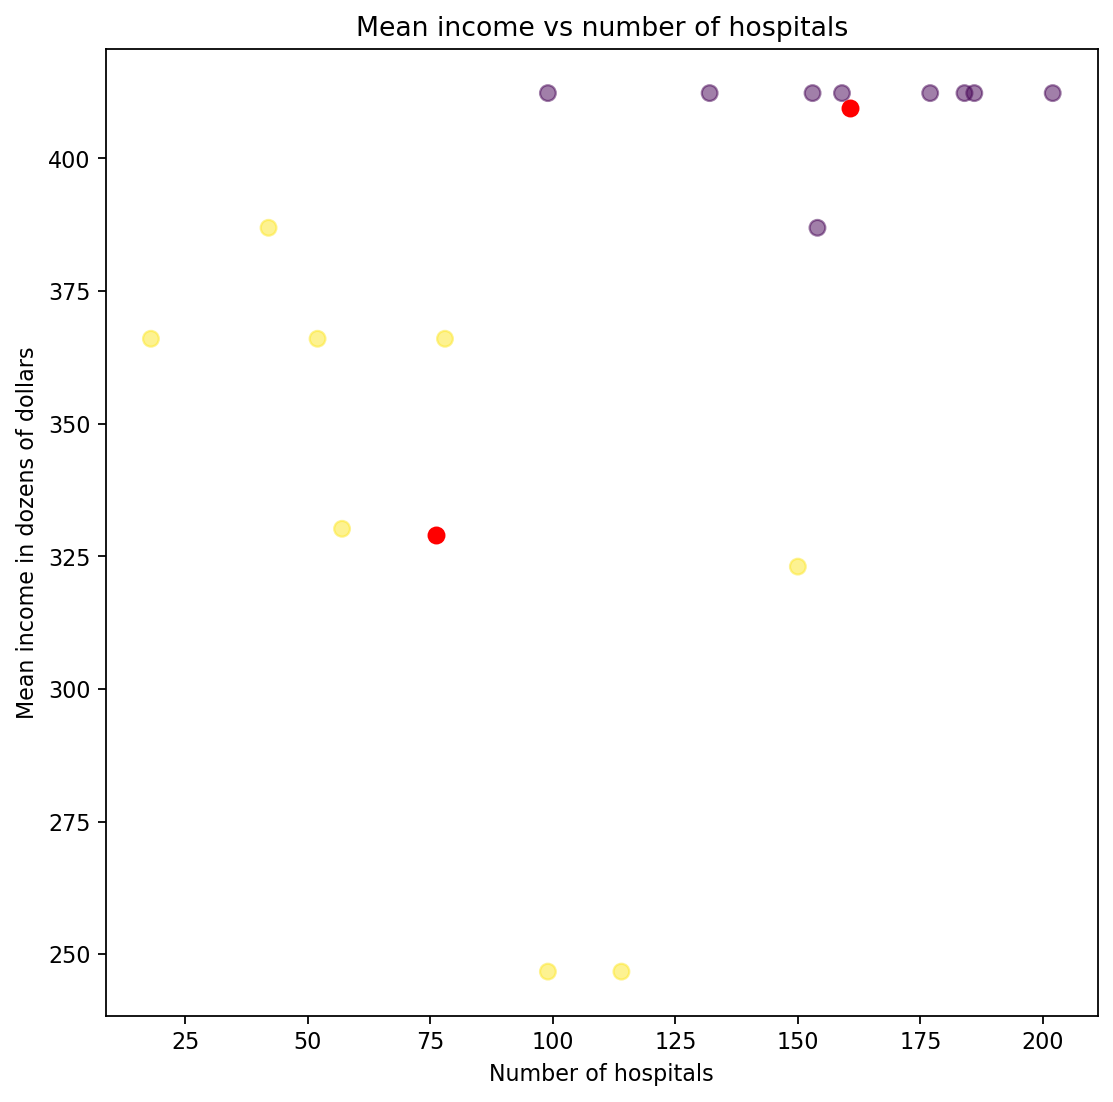

In [105]:
#It is possible to see only non empty cells
df_population_clustered2=df_population_clustered.dropna()

df_population_clustered2['Mean income/10']=df_population_clustered2['Mean income']/10
#So, lets try to cluster this and check our conclusion:

# start clustering
kmeans = KMeans(n_clusters=2, init = "k-means++", n_init = 24).fit(df_population_clustered2.iloc[:,[1,-1]])#I tried to use numbers of clusters 2, 3 and 4
#k_means.fit(df_population_clustered)

centroids = kmeans.cluster_centers_
# check the result
plt.figure(figsize=(8, 8), dpi=160)
plt.scatter(df_population_clustered2['N_clinics'], df_population_clustered2['Mean income/10'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.title('Mean income vs number of hospitals')
plt.xlabel('Number of hospitals')
plt.ylabel('Mean income in dozens of dollars')

plt.savefig('DR-checking.png', format='png')
### SAVE result into dataframe
predict=kmeans.predict(df_population_clustered2.iloc[:,[1,-1]])

df_population_clustered2['Recount Donor or Recipient'] = pd.Series(predict, index=df_population_clustered2.index)
df_population_clustered2.sort_values('Class')


In [107]:
df_population_clustered2['Recount Donor or Recipient']=df_population_clustered2['Recount Donor or Recipient'].replace({1:'R',0:'D'})
df_clustered_checked=df_population_clustered2.loc[:,['Country','City','Donor or Recipient','Recount Donor or Recipient','Class']]


In [108]:
job_result=df_clustered_checked.loc[df_clustered_checked['Donor or Recipient']==df_clustered_checked['Recount Donor or Recipient'],['Country','City','Donor or Recipient','Class']].reset_index(drop=True)
job_result

,Country,City,Donor or Recipient,Class
0,United States,New York City,R,3
1,United States,Los Angeles,R,3
2,United Kingdom,London,R,0
3,United States,Chicago,R,0
4,United States,Philadelphia,R,0
5,Spain,Madrid,D,2
6,United States,Dallas,R,0
7,United States,Houston,R,3
8,Spain,Barcelona,D,2
9,United States,Phoenix,R,0


## At the end of the this survey you can see, that there are not enough data for all of the cities.
## Anyway, some facts are cleared:
* it is possible to evolve internal tourism in USA: on the basis of monthly income, people have enough money to pay for treatment, but there aren't enough hospitals in some cities. So, despite the fact that some cities are labeled as R (recipients), they actually may have not enough clinics to receive patients, and should be labeled as D (donors).
* the same can be said about Germany, Canada and United Kingdom.
* it should be noted that the relative lack of hospitals may be corresponded with the higher efficiency and cost (also because of high demand)
* it can be seen from the table 'Potential recipients' that there are many potential recipients in different countries. Beside they can have lower income and lower medicine opportunities, they have another advantages in the view of lower cost of treatment. So, they can provide low-cost services.


#### I revealed the list of country of high-risk developing of medical tourism because of low monthly income of their civilians:
#### But it can be a good idea to follow them and to catch the moment of economic surge.

In [110]:
month_income_clustered.loc[month_income_clustered['Class']==0,:]

,Country,Class,Mean 1998-2008,Mean 2009-2017
0,Albania,0,176.86,354.69
1,Armenia,0,101.35,338.31
3,Azerbaijan,0,120.14,437.40
6,Croatia,0,912.82,1323.12
7,Czechia,0,696.19,1255.32
9,Estonia,0,567.75,1208.44
12,Georgia,0,108.68,399.71
15,Hungary,0,728.19,1070.53
19,Kazakhstan,0,222.80,568.64
20,Lithuania,0,436.36,839.51
